In [ ]:
# from google.colab import files

# uploaded = files.upload()

## Importing Libraries

In [ ]:
# for numerical operations
import numpy as np

# for dataframe operations
import pandas as pd

# data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for machine learning algorithms
import sklearn
import imblearn

## Reading the Dataset

In [ ]:
# lets import the dataset using the read_csv function
data = pd.read_csv('LoanData.csv')

# lets check the shape of the dataset
data.shape

(614, 13)

In [ ]:
# lets check the column names present in the dataset
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
# lets check the head of the dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Descriptive Statistics

In [ ]:
# for numerical variables
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# for categorical variables
data.describe(include = 'object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [ ]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## Data Cleaning

In [ ]:
# checking no. of Missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# using mode values to impute categorical columns

data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

# using median values to impute the numerical columns

data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

# lets check if there is any null values left or not
data.isnull().sum().sum()

0

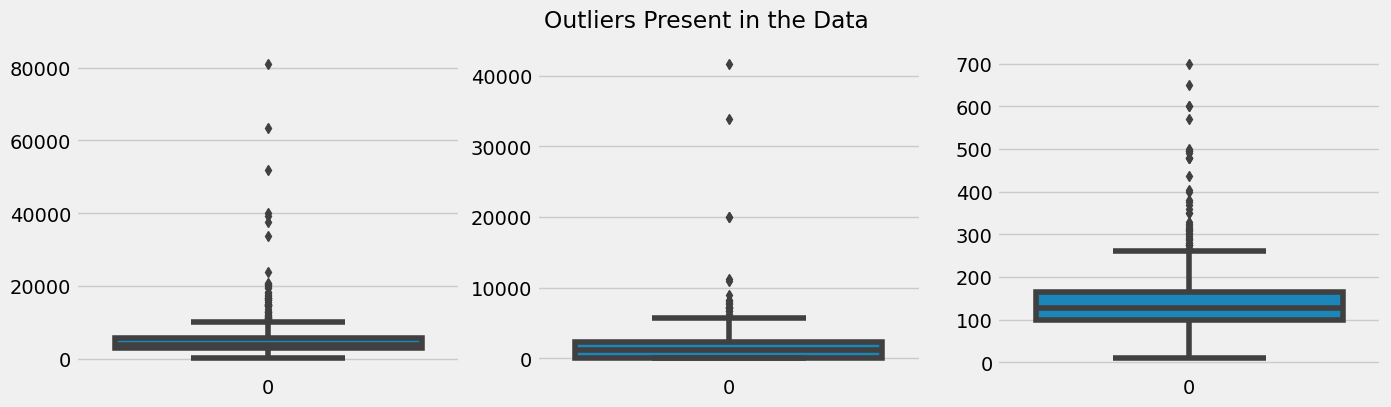

In [ ]:
# lets visualize the outliers using Box Plot

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 3, 1)
sns.boxplot(data['ApplicantIncome'])

plt.subplot(1, 3, 2)
sns.boxplot(data['CoapplicantIncome'])

plt.subplot(1, 3, 3)
sns.boxplot(data['LoanAmount'])

plt.suptitle('Outliers Present in the Data')
plt.show()

In [ ]:
# lets remove the outliers from the data

#lets check the shape before removing outliers
print("Before Removing Outliers ", data.shape)

# lets filter the customers having more than 25000 income
data = data[data['ApplicantIncome'] < 25000]

#lets check the shape after removing outliers
print("After Removing Outliers ", data.shape)

Before Removing Outliers  (614, 13)
After Removing Outliers  (607, 13)


In [ ]:
# lets remove the outliers from co-applicant's Income

#lets check the shape before removing outliers
print("Before Removing Outliers ", data.shape)

# lets filter the customers having more than 10000 coapplicant income
data = data[data['CoapplicantIncome'] < 10000]

#lets check the shape after removing outliers
print("After Removing Outliers ", data.shape)

Before Removing Outliers  (607, 13)
After Removing Outliers  (601, 13)


In [ ]:
# lets remove the outliers from Loan Amount

#lets check the shape before removing outliers
print("Before Removing Outliers ", data.shape)

# lets filter the customers having more than 400 loan amount
data = data[data['LoanAmount'] < 400]

#lets check the shape after removing outliers
print("After Removing Outliers ", data.shape)

Before Removing Outliers  (601, 13)
After Removing Outliers  (590, 13)


## Univariate Data Analysis

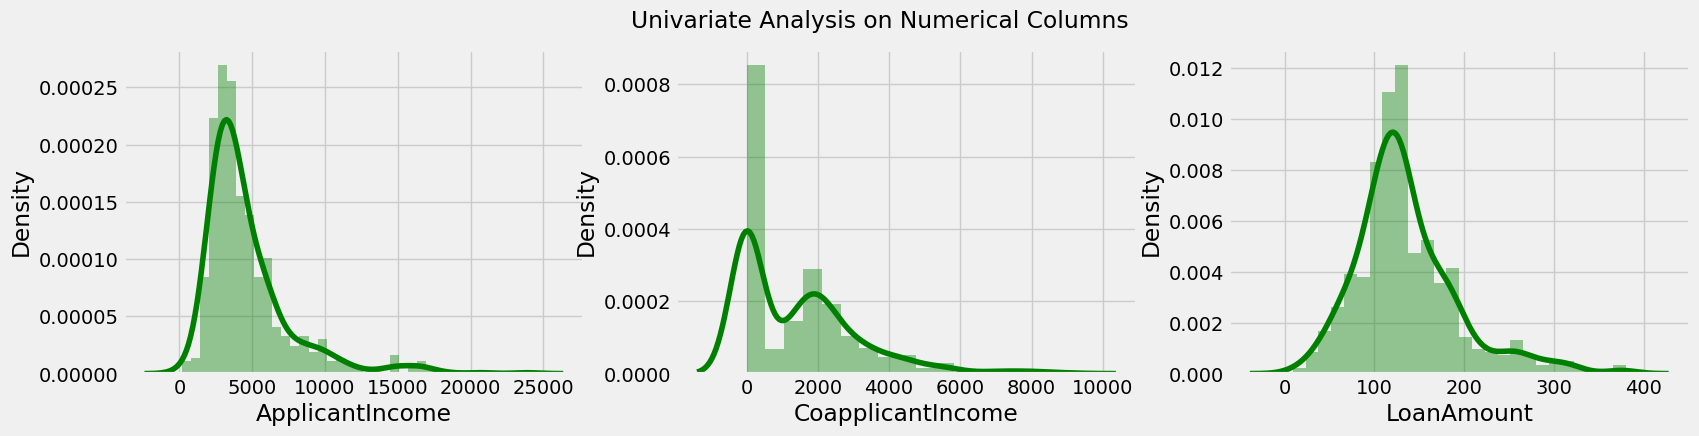

In [ ]:
# Univariate Analysis on Numerical Columns

plt.rcParams['figure.figsize'] = (18, 4)
plt.subplot(1,3, 1)
sns.distplot(data['ApplicantIncome'], color = 'green')

plt.subplot(1,3, 2)
sns.distplot(data['CoapplicantIncome'], color = 'green')

plt.subplot(1,3, 3)
sns.distplot(data['LoanAmount'], color = 'green')

plt.suptitle('Univariate Analysis on Numerical Columns')
plt.show()

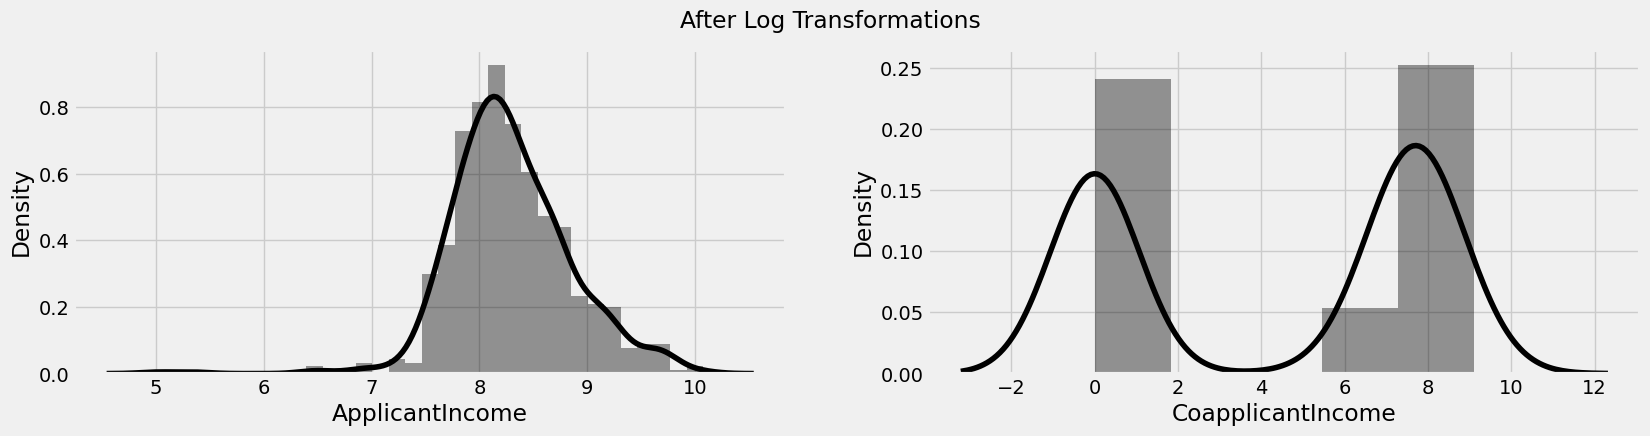

In [ ]:
# lets remove skewness from ApplicantIncome and Coapplicant Income, as it can add bias to the data

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (18, 4)

# lets apply log transformation to remove skewness
data['ApplicantIncome'] = np.log(data['ApplicantIncome'])
data['CoapplicantIncome'] = np.log1p(data['CoapplicantIncome'])

# lets plot them and check whether the skewness is removed or not
plt.subplot(1, 2, 1)
sns.distplot(data['ApplicantIncome'], color = 'black')

plt.subplot(1, 2, 2)
sns.distplot(data['CoapplicantIncome'], color = 'black')

plt.suptitle('After Log Transformations')
plt.show()


### Bivariate Data Analysis

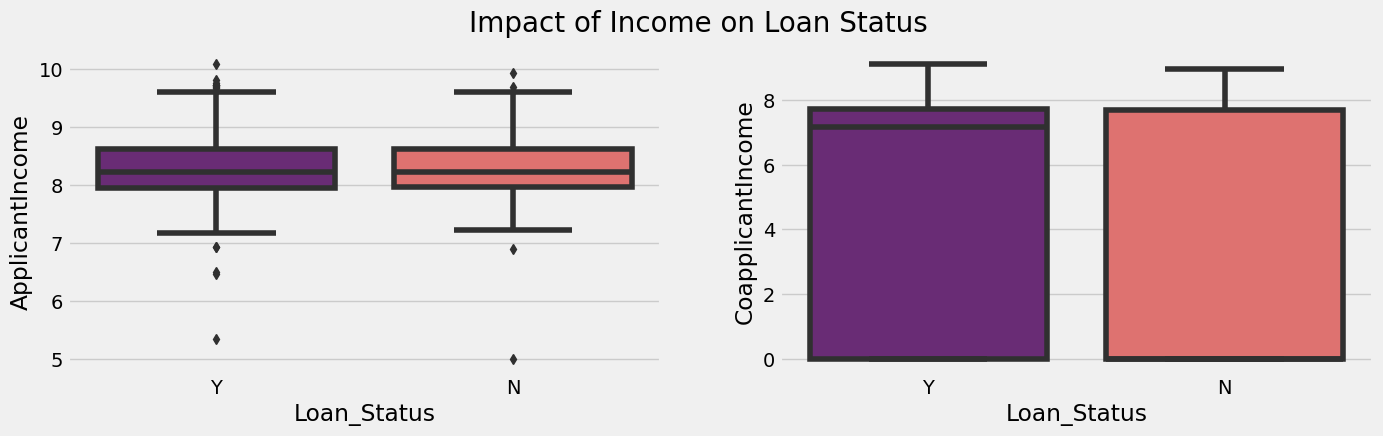

In [ ]:
# ### Lets check the Impact of Income of Applicant and Co-applicant on Loan Status


import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.rcParams['figure.figsize'] = (15, 4)

# Create two subplots side by side
plt.subplot(1, 2, 1)
sns.boxplot(x=data['Loan_Status'], y=data['ApplicantIncome'], palette='magma')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['Loan_Status'], y=data['CoapplicantIncome'], palette='magma')

# Set a common title for the entire figure
plt.suptitle('Impact of Income on Loan Status\n', fontsize=20)

# Show the plots
plt.show()


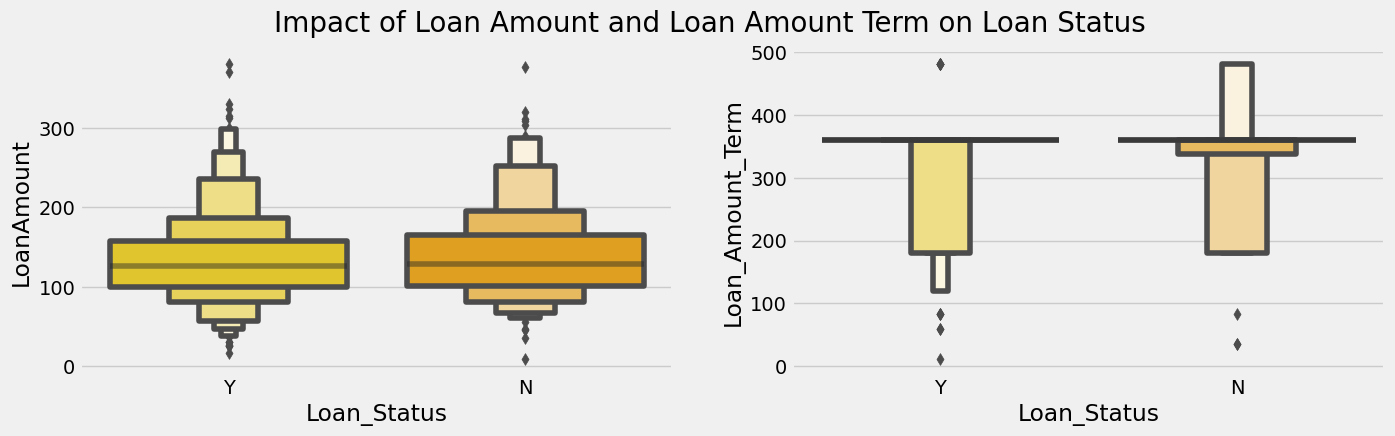

In [ ]:
# # lets check the Impact of Amount on Loan Status

import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.rcParams['figure.figsize'] = (15, 4)

# Create two subplots side by side
plt.subplot(1, 2, 1)
sns.boxenplot(x=data['Loan_Status'], y=data['LoanAmount'], palette='Wistia')

plt.subplot(1, 2, 2)
sns.boxenplot(x=data['Loan_Status'], y=data['Loan_Amount_Term'], palette='Wistia')

# Set a common title for the entire figure
plt.suptitle('Impact of Loan Amount and Loan Amount Term on Loan Status\n', fontsize=20)

# Show the plots
plt.show()


### Comparing Categorical Data with Target Columns

In [ ]:
# lets compare all the Categories with respect to the Loan Status to understand the Overall Impact

print("Impact of Marraige on Loan Status")
print(pd.crosstab(data['Loan_Status'], data['Married']))
print('\n')

print("Impact of Dependents on Loan Status")
print(pd.crosstab(data['Loan_Status'], data['Dependents']))
print('\n')

print("Impact of Education on Loan Status")
print(pd.crosstab(data['Loan_Status'], data['Education']))
print('\n')

print("Impact of Employment on Loan Status")
print(pd.crosstab(data['Loan_Status'], data['Self_Employed']))
print('\n')

print("Impact of Property on Loan Status")
print(pd.crosstab(data['Loan_Status'], data['Property_Area']))

Impact of Marraige on Loan Status
Married       No  Yes
Loan_Status          
N             76  106
Y            130  278


Impact of Dependents on Loan Status
Dependents     0   1   2  3+
Loan_Status                 
N            110  33  24  15
Y            240  63  74  31


Impact of Education on Loan Status
Education    Graduate  Not Graduate
Loan_Status                        
N                 130            52
Y                 326            82


Impact of Employment on Loan Status
Self_Employed   No  Yes
Loan_Status            
N              157   25
Y              357   51


Impact of Property on Loan Status
Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         51     65
Y                108        171    129


## Data Preparation

In [ ]:
# lets check the columns which are of object data types
data.select_dtypes('object').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [ ]:
# lets delete the loan Id column from the data as this column has no relation with loan status

# lets check the shape of the data before deleting the columns
print("Before Deleting Columns :", data.shape)

data = data.drop(['Loan_ID'], axis = 1)

# lets check the shape of the data after deleting the columns
print("After Deleting Columns :", data.shape)

Before Deleting Columns : (590, 13)
After Deleting Columns : (590, 12)


In [ ]:
# lets encode other columns

data['Gender'] = data['Gender'].replace(('Male','Female'),(1, 0))
data['Married'] = data['Married'].replace(('Yes','No'),(1, 0))
data['Education'] = data['Education'].replace(('Graduate','Not Graduate'), (1, 0))
data['Self_Employed'] = data['Self_Employed'].replace(('Yes','No'), (1, 0))
data['Loan_Status'] = data['Loan_Status'].replace(('Y','N'), (1, 0))

# as seen above that Urban and Semi Urban Property have very similar Impact on Loan Status, so, we will merge them together
data['Property_Area'] = data['Property_Area'].replace(('Urban','Semiurban', 'Rural'),(1, 1, 0))

# as seen above that apart from 0 dependents, all are similar hence, we merge them to avoid any confusion
data['Dependents'] = data['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 1, 1))

# lets check whether there is any object column left
data.select_dtypes('object').columns

Index([], dtype='object')

In [ ]:
# lets split the Target column from the Data

y = data['Loan_Status']
x = data.drop(['Loan_Status'], axis = 1)

# lets check the shape of x and y
print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

Shape of x : (590, 11)
Shape of y : (590,)


### Resampling for Balancing the Data

In [ ]:

# It is very important to resample the data, as the Target class is Highly imbalanced.
# Here We are going to use Over Sampling Technique to resample the data.
# lets import the SMOTE algorithm to do the same.

from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE()

# Use fit_resample to resample the data
x_resample, y_resample = smote.fit_resample(x, y)

# Print the shape of x and y after resampling
print(x_resample.shape)
print(y_resample.shape)


(816, 11)
(816,)


In [ ]:
# # lets also check the value counts of our target variable4

# Print the value counts of the target variable before resampling
print("Before Resampling:")
print(y.value_counts())

# Print the value counts of the target variable after resampling
print("After Resampling:")
print(y_resample.value_counts())




Before Resampling:
1    408
0    182
Name: Loan_Status, dtype: int64
After Resampling:
1    408
0    408
Name: Loan_Status, dtype: int64


In [ ]:
# lets split the test data from the training data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

# lets print the shapes again
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Test :", x_test.shape)
print("Shape of the y Test :", y_test.shape)

Shape of the x Train : (652, 11)
Shape of the y Train : (652,)
Shape of the x Test : (164, 11)
Shape of the y Test : (164,)


## Machine Learning Modelling

In [ ]:
# lets apply Logistic Regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.7745398773006135
Testing Accuracy : 0.8414634146341463


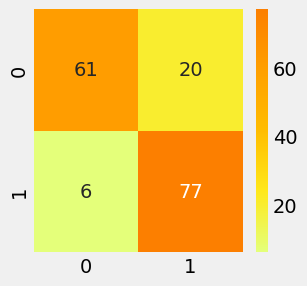

              precision    recall  f1-score   support

           0       0.91      0.75      0.82        81
           1       0.79      0.93      0.86        83

    accuracy                           0.84       164
   macro avg       0.85      0.84      0.84       164
weighted avg       0.85      0.84      0.84       164



In [ ]:
# lets analyze the Performance using Confusion matrix

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

# lets also use classification report for performance analysis
cr = classification_report(y_test, y_pred)
print(cr)

### Applying Gradient Boosting

In [ ]:
# lets apply DecisionTrees

from sklearn.ensemble import GradientBoostingClassifier

model =  GradientBoostingClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.9125766871165644
Testing Accuracy : 0.8109756097560976


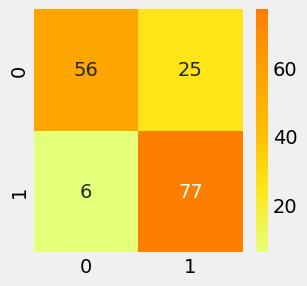

              precision    recall  f1-score   support

           0       0.90      0.69      0.78        81
           1       0.75      0.93      0.83        83

    accuracy                           0.81       164
   macro avg       0.83      0.81      0.81       164
weighted avg       0.83      0.81      0.81       164



In [ ]:
# lets analyze the Performance using Confusion matrix

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

# lets also use classification report for performance analysis
cr = classification_report(y_test, y_pred)
print(cr)

In [ ]:
from sklearn.model_selection import cross_val_score

clf = GradientBoostingClassifier(random_state = 0)
scores = cross_val_score(clf, x_train, y_train, cv=10)
print(scores)

[0.74242424 0.78787879 0.84615385 0.84615385 0.73846154 0.83076923
 0.84615385 0.76923077 0.83076923 0.8       ]
